In [ ]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from scipy.stats import mstats
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




In [ ]:
# Import Dataset

dataset_dir = '/content/drive/MyDrive/DATASETS/Datasets_Bootcamp/House_Loan_Data_Analysis_dataset/loan_data.csv'

df = pd.read_csv(dataset_dir)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Check for missing values

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)


AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

Observations :

Several columns related to building characteristics, such as BASEMENTAREA, YEARS_BUILD, ELEVATORS, ENTRANCES, and LIVINGAREA, have a large number of missing values across their AVG, MODE, and MEDI statistics.
The columns related to social circle observations, such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, and similar, have 1,021 missing values.
Some columns have a few missing values, like DAYS_LAST_PHONE_CHANGE, which only has one missing value.


In [ ]:
# Drop Columns with substantial amount of missing data

substantial_missing_columns = missing_percentage[missing_percentage > 45].index

# Drop Columns

df_clean = df.drop(substantial_missing_columns,axis = 1)

df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# ReDisplay Missing Values

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (df_clean.isnull().sum() / len(df_clean)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64


Observations :

Lets drop the rows containing missing values in columns that have less than 1% of missing data.

In [ ]:
# Identify columns with less than 1% missing data
columns_to_drop_na = missing_percentage[missing_percentage < 1].index

# Drop rows with missing values in those specific columns
df_clean = df_clean.dropna(subset=columns_to_drop_na)

# Display the updated DataFrame
df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# ReDisplay Missing Values

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values
missing_percentage = (df_clean.isnull().sum() / len(df_clean)) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

OCCUPATION_TYPE               31.338353
EXT_SOURCE_3                  19.784849
AMT_REQ_CREDIT_BUREAU_HOUR    13.498790
AMT_REQ_CREDIT_BUREAU_DAY     13.498790
AMT_REQ_CREDIT_BUREAU_WEEK    13.498790
AMT_REQ_CREDIT_BUREAU_MON     13.498790
AMT_REQ_CREDIT_BUREAU_QRT     13.498790
AMT_REQ_CREDIT_BUREAU_YEAR    13.498790
dtype: float64


Observations :

Lets fill the remaining missing values with median and mode imputations.

In [ ]:
# Mode Imputation for 'OCCUPATION_TYPE' (Categorical)
df_clean['OCCUPATION_TYPE'] = df_clean['OCCUPATION_TYPE'].fillna(df_clean['OCCUPATION_TYPE'].mode()[0])

# Median Imputation for 'EXT_SOURCE_3' (Numerical)
df_clean['EXT_SOURCE_3'] = df_clean['EXT_SOURCE_3'].fillna(df_clean['EXT_SOURCE_3'].median())

# Median Imputation for 'AMT_REQ_CREDIT_BUREAU_*' Columns (Numerical)
credit_bureau_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                         'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in credit_bureau_columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Display updated DataFrame
print(df_clean.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

Observations :

All the missing data has been computed.

In [ ]:
# Calculate percentage of default to a payer

len(df_clean[df_clean['TARGET'] == 0])/ len(df_clean['TARGET']) * 100

91.90000361211173

Observations :

Our Target variable is heavily imbalanced and we'll have to perform rebalancing later.

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>, <Axes: >]], dtype=object)

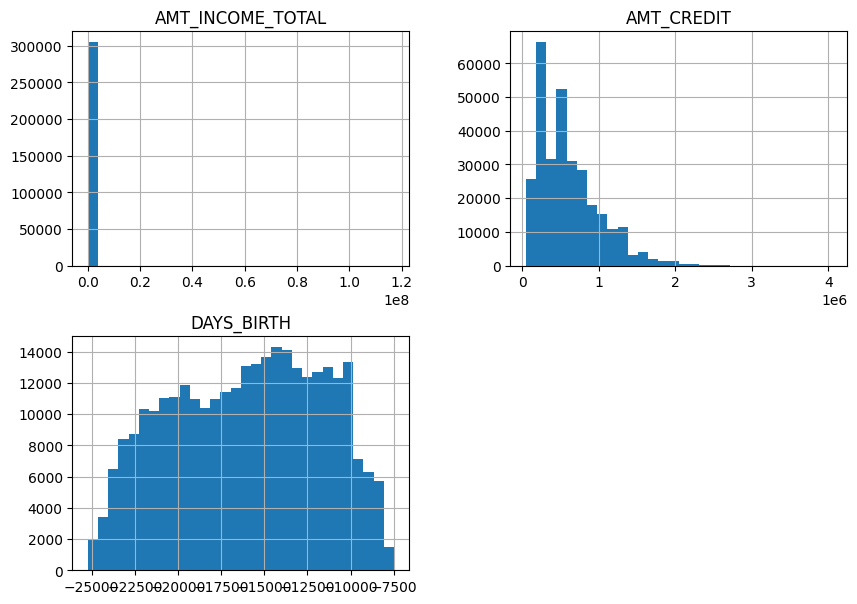

In [ ]:
# Numerical Feature Analysis

df_clean[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']].hist(bins=30, figsize=(10, 7))

Observations :

1. AMT_INCOME_TOTAL:
The plot shows a large spike at a very low income value, with a few extremely high outliers. The income distribution seems to be highly skewed to the right.
Action: Investigate the extreme outliers, as they may distort models.

2. AMT_CREDIT:
The credit amount distribution is also right-skewed, with most of the data concentrated below 1 million, but there are observations up to 4 million.
Action: A similar approach to the AMT_INCOME_TOTAL might be needed here.

3. DAYS_BIRTH:
This histogram shows the age distribution (probably in days, hence the negative values). It seems to have a fairly normal distribution, though slightly skewed, with most people between 20,000 and 25,000 days old (around 55-70 years).

<Axes: >

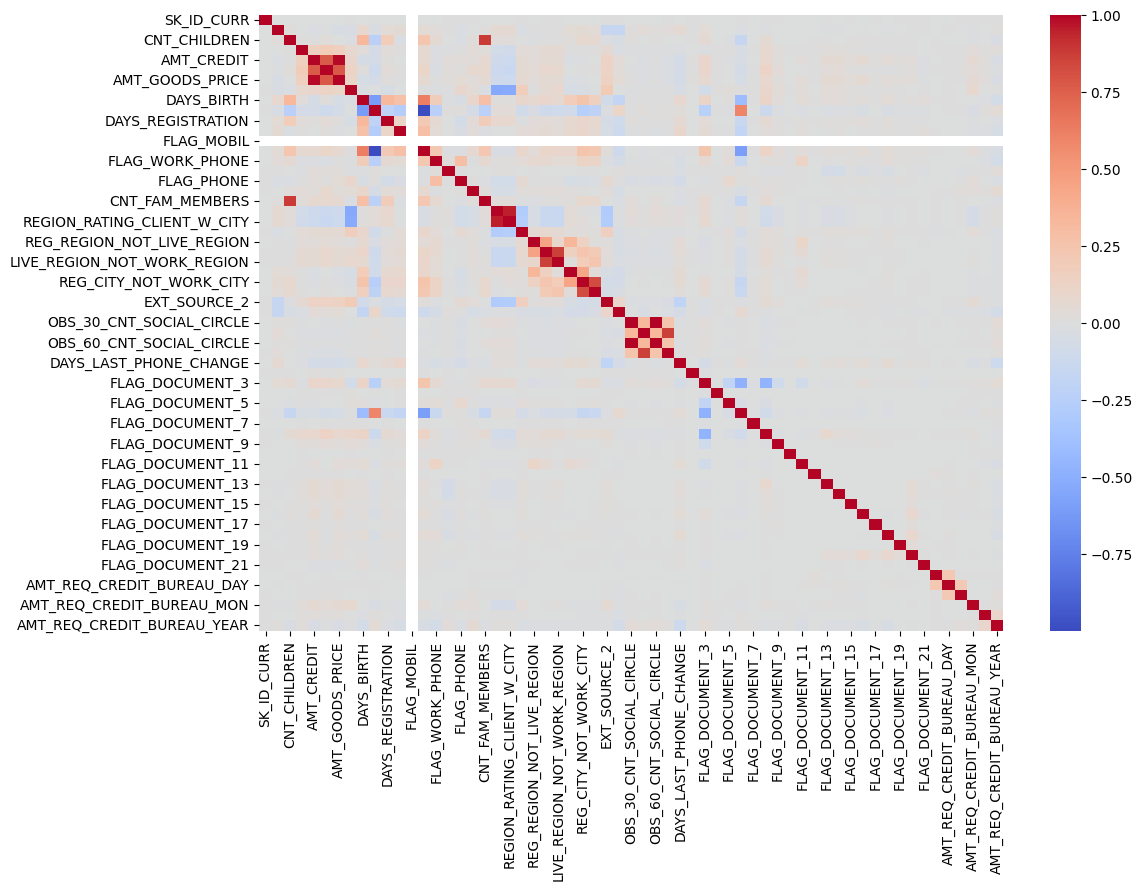

In [ ]:
# Correlation Matrix


plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.select_dtypes(include=[float, int]).corr(), annot=False, cmap='coolwarm')

Observations :

Strong Correlations:

Features like AMT_CREDIT and AMT_GOODS_PRICE seem to have a high positive correlation, which makes sense as they both relate to financial values (credit and goods price).

Weak Correlations:

Most of the other variables appear to have weak correlations with each other, indicated by the light blue and light red colors.
This suggests that many of the features are not highly linearly related, which is good for maintaining diversity in the data for machine learning models.

Negative Correlations:

Some light blue areas indicate negative correlations between features. For example, you might find a slight negative correlation between certain social circle variables and financial ones, though these correlations are not very strong.

<Axes: xlabel='CODE_GENDER'>

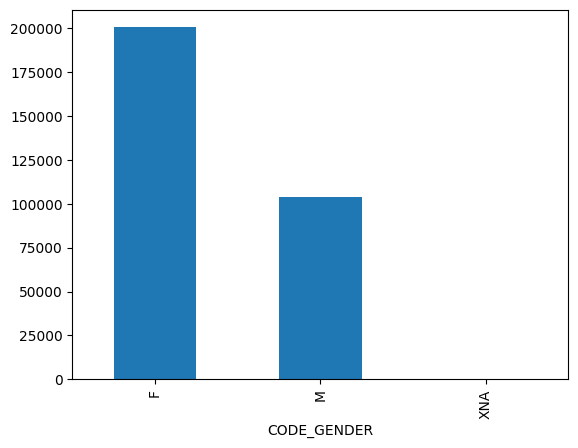

In [ ]:
# Categorical Features Analysis

df_clean['CODE_GENDER'].value_counts().plot(kind='bar')

Observations:
Gender Distribution:
There are significantly more female (F) clients than male (M) clients in the dataset.
A small portion of the data is labeled as XNA, which might represent unknown or unspecified gender. This could be an anomaly or a placeholder for missing values.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

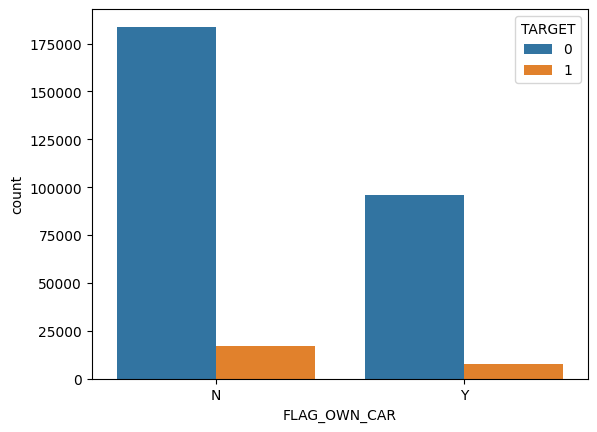

In [ ]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df_clean)


Observations:

Flag for Owning a Car (FLAG_OWN_CAR):
Clients who do not own a car (N) are more frequent in the dataset compared to those who own a car (Y).
Default Rates (Target = 1):
Among clients who do not own a car, there is a higher number of defaulters (orange bars). However, the overall number of non-defaulters (blue bars) remains significantly higher.
Clients who own a car also show a similar trend, where non-defaulters significantly outnumber defaulters, but there are fewer total clients in this group.

Insights:

Relationship between Car Ownership and Defaulting:
From this plot, it appears that owning a car might have a slight influence on default rates, though a deeper analysis would be needed to confirm this, such as using logistic regression or another model to see the strength of the correlation.


In [ ]:
# Chi Square Test to see if there is correlation between car ownership and defaulting

# Create a contingency table
contingency_table = pd.crosstab(df_clean['FLAG_OWN_CAR'], df_clean['TARGET'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
if p < 0.05:
    print("P-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant association between car ownership and defaulting.")
else:
    print("P-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant association between car ownership and defaulting.")

Chi-Square Test Statistic: 144.59428515061694
P-Value: 2.634275071862213e-33
Degrees of Freedom: 1
Expected Frequencies Table:
 [[184636.29725709  16273.70274291]
 [ 95227.70274291   8393.29725709]]
P-value is less than 0.05, so we reject the null hypothesis.
There is a significant association between car ownership and defaulting.


Observation :

Ownership of Car is an important factor in determining loan defaulting.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

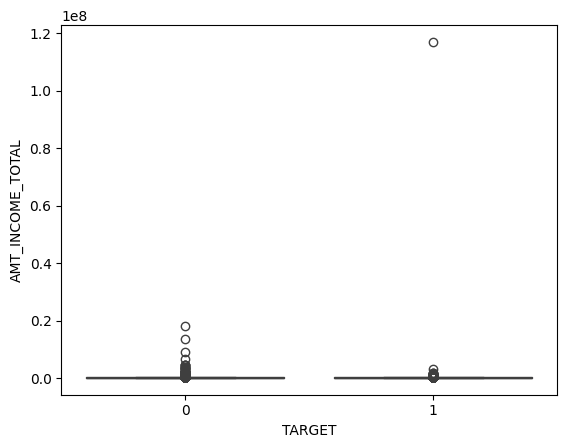

In [ ]:
# Featur Relationships with Target

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_clean)


Observations:

Outliers:

There are several extreme outliers in the income variable for both the default (TARGET = 1) and non-default (TARGET = 0) groups. The most extreme outlier is over 100 million in income, which is significantly higher than the rest of the data.

Income Distribution:

For both groups (default and non-default), most of the data points are concentrated near the lower end of the income range, as indicated by the tight boxplot at the bottom.
The median incomes for both groups appear to be similar, but the outliers stretch quite far for both groups, especially for the non-default group (TARGET = 0).


<ipython-input-17-fe3f786ff166>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean[df_clean['TARGET'] == 0][col], label='Non-default', shade=True)
<ipython-input-17-fe3f786ff166>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean[df_clean['TARGET'] == 1][col], label='Default', shade=True)


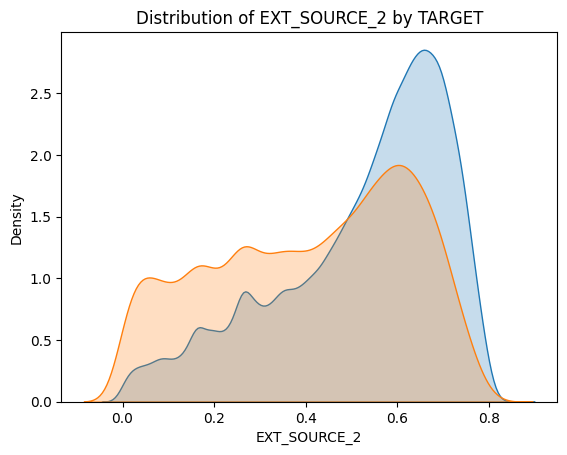

<ipython-input-17-fe3f786ff166>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean[df_clean['TARGET'] == 0][col], label='Non-default', shade=True)
<ipython-input-17-fe3f786ff166>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean[df_clean['TARGET'] == 1][col], label='Default', shade=True)


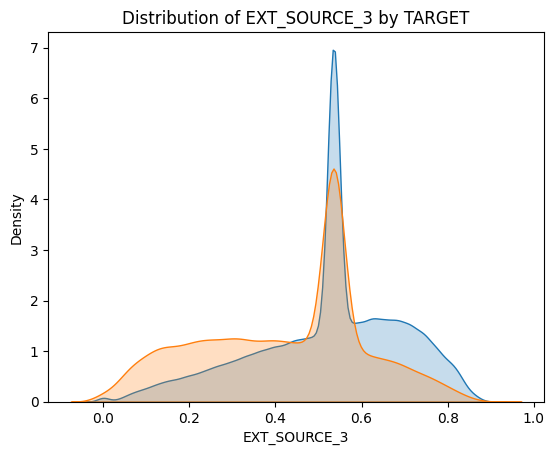

In [ ]:
# KDE for continous variables for different Target Classes

for col in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
    sns.kdeplot(df_clean[df_clean['TARGET'] == 0][col], label='Non-default', shade=True)
    sns.kdeplot(df_clean[df_clean['TARGET'] == 1][col], label='Default', shade=True)
    plt.title(f'Distribution of {col} by TARGET')
    plt.show()

1. EXT_SOURCE_2 Distribution:

Non-default (TARGET = 0, blue curve):
The distribution is more right-skewed, with a peak around 0.7. This suggests that individuals who do not default tend to have higher values in EXT_SOURCE_2.
Default (TARGET = 1, orange curve):
The distribution for defaulters is more spread out and skewed toward lower values, with a peak around 0.4.
Interpretation: Higher values of EXT_SOURCE_2 seem to be associated with a lower likelihood of default, which could indicate that this external source score is positively correlated with better credit behavior.

2. EXT_SOURCE_3 Distribution:

Non-default (TARGET = 0, blue curve):
The non-defaulters show a sharp peak around 0.5-0.6, indicating that the majority of non-defaulters tend to have values concentrated in this range.
Default (TARGET = 1, orange curve):
The defaulters have a flatter, more spread-out distribution with peaks around 0.2-0.4.

Interpretation: Like EXT_SOURCE_2, EXT_SOURCE_3 seems to be an important predictor of default risk. Individuals with lower EXT_SOURCE_3 values tend to default more frequently.

Insights:
Both external scores (EXT_SOURCE_2 and EXT_SOURCE_3) have strong separations between defaulters and non-defaulters.
These features could be significant predictors in any credit default prediction model.




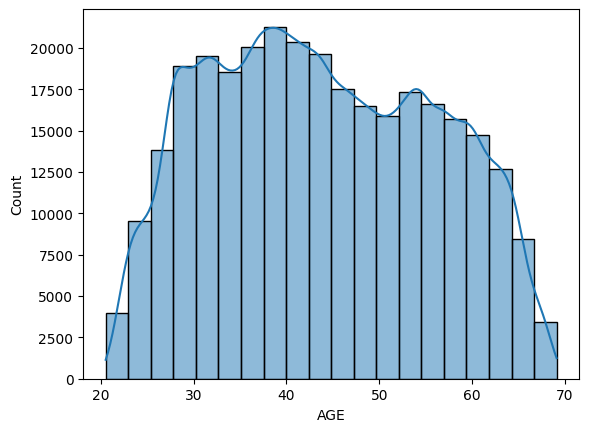

In [ ]:
# Time Related Analysis :

# Create Age Feature

df_clean['AGE'] = abs(df_clean['DAYS_BIRTH']) / 365
sns.histplot(df_clean['AGE'], bins=20, kde=True)

# Drop Days_Birth

df_clean = df_clean.drop('DAYS_BIRTH',axis = 1)

Observations:

Age Distribution:

The age distribution appears to be approximately uniform between ages 30 to 60, with a peak around the late 30s to early 40s.
There is a gradual decline in frequency after the age of 60, and fewer individuals are younger than 30 in the dataset.

Age Range:

The dataset includes individuals roughly between 20 and 70 years of age, though the highest concentration is between 30 and 60 years.

<ipython-input-19-29a9a7f88932>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_default_rate = df_clean.groupby('AGE_GROUP')['TARGET'].mean() * 100


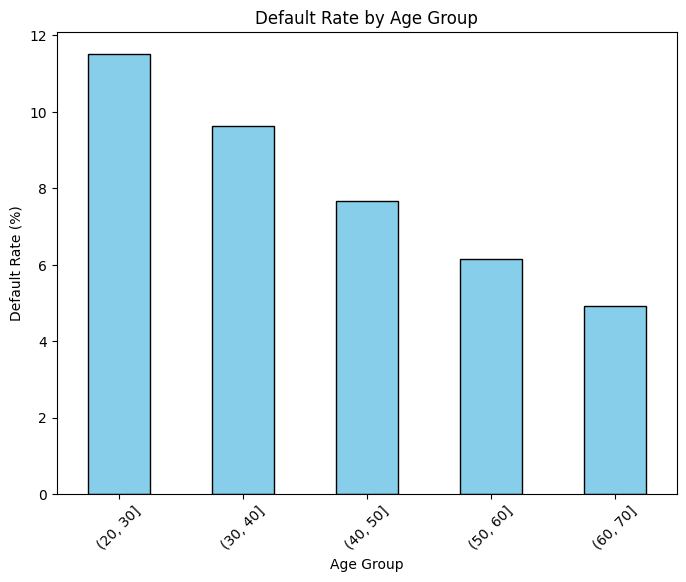

In [ ]:
# Correlation of Age with Target

# Create age bins
age_bins = [20, 30, 40, 50, 60, 70]
df_clean['AGE_GROUP'] = pd.cut(df_clean['AGE'], bins=age_bins)

# Calculate default rate for each age group
age_group_default_rate = df_clean.groupby('AGE_GROUP')['TARGET'].mean() * 100

# Plot the default rates by age group
plt.figure(figsize=(8, 6))
age_group_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rate by Age Group')
plt.ylabel('Default Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

Observations:

Higher Default Rates for Younger Age Groups:

The 20-30 age group has the highest default rate, approaching 12%.
The default rate decreases as age increases, with the 30-40 age group having a default rate around 10%, and the 40-50 age group showing a further decline.

Lower Default Rates for Older Age Groups:
For individuals aged 50-60, the default rate is around 6%, and for those in the 60-70 range, it drops to approximately 4%.

Insights:

Age and Default Risk: There is a clear trend where younger individuals (especially those in their 20s and 30s) are more likely to default on loans than older individuals.

Risk Mitigation for Younger Groups: This insight could help in developing risk-mitigation strategies for younger clients, such as stricter credit assessments or different loan terms for younger applicants.

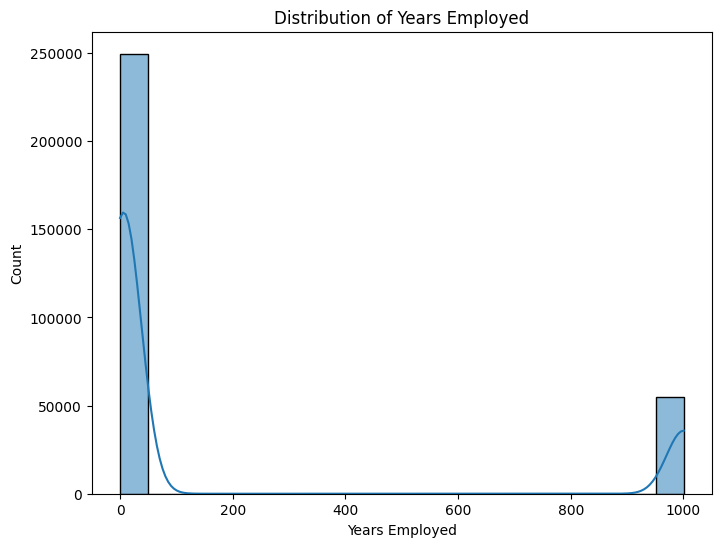

In [ ]:
# Correlation of Time Employed and Target

# Convert DAYS_EMPLOYED to years
df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365

# Drop Days Employed as no longer needed
df_Clean = df.drop('DAYS_EMPLOYED',axis = 1)

plt.figure(figsize=(8, 6))
sns.histplot(df_clean['YEARS_EMPLOYED'], bins=20, kde=True)
plt.title('Distribution of Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.show()

Observations:

Spike at 1000 Years:

There’s a significant spike around 1000 years of employment, which is clearly unrealistic.
This suggests that there is likely some data entry error or a placeholder value used for certain records.
Majority of Data at Low Employment Years:

The majority of the data shows realistic employment durations, with most individuals having up to 40-50 years of employment.

Possible Reasons:

The 1000 years might be a placeholder for individuals with unknown or extremely long employment histories. It could have been entered as an error or to represent something like "retired" or "unemployed" status in some cases.

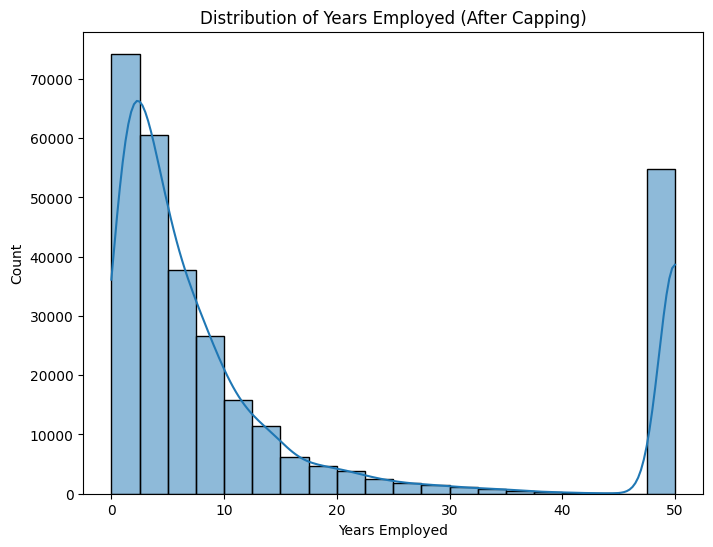

In [ ]:
# Cap extreme values of years employed at 50 years
df_clean['YEARS_EMPLOYED'] = df_clean['YEARS_EMPLOYED'].apply(lambda x: x if x < 50 else 50)

# Plot the updated histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['YEARS_EMPLOYED'], bins=20, kde=True)
plt.title('Distribution of Years Employed (After Capping)')
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.show()

<ipython-input-22-b0b85a3787d9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employment_default_rate = df_clean.groupby('EMPLOYMENT_GROUP')['TARGET'].mean() * 100


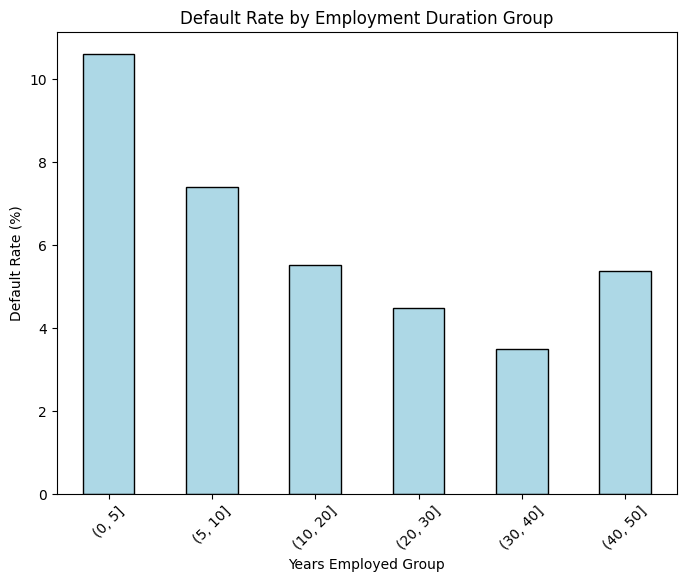

In [ ]:
# Create bins for employment duration (YEARS_EMPLOYED)
employment_bins = [0, 5, 10, 20, 30, 40, 50]
df_clean['EMPLOYMENT_GROUP'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=employment_bins)

# Calculate default rate for each employment group
employment_default_rate = df_clean.groupby('EMPLOYMENT_GROUP')['TARGET'].mean() * 100

# Plot the default rates by employment group
plt.figure(figsize=(8, 6))
employment_default_rate.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Default Rate by Employment Duration Group')
plt.ylabel('Default Rate (%)')
plt.xlabel('Years Employed Group')
plt.xticks(rotation=45)
plt.show()


Observations:

High Default Rates for Shorter Employment Durations:

The 0-5 years group has the highest default rate at over 10%, which indicates that individuals with shorter employment durations are more likely to default.
The 5-10 years group also shows a relatively high default rate, around 7-8%.
Lower Default Rates for Longer Employment Durations:

The default rate decreases as employment duration increases, with the 10-20 years and 20-30 years groups having default rates of around 5-6%.
The 30-40 years group has the lowest default rate, at around 4%.
Slight Increase for 40-50 Years Group:

Interestingly, the 40-50 years group shows a slight increase in default rate, rising to about 5%. This could suggest that individuals at the tail end of their careers or those who reported long employment durations have slightly higher risks than the preceding group.

Insights:

Short Employment Duration as a Risk Factor: The high default rates for individuals with fewer than 10 years of employment suggest that employment stability could be a significant predictor of default risk. This makes sense, as shorter employment durations could be associated with lower financial stability.

Mid to Long-Term Employment Lower Risk: Individuals with 20-40 years of employment have the lowest risk of default, likely due to their financial stability built over longer careers.

Possible Anomalies for Long-Term Employees: The slight increase in the default rate for those employed for 40-50 years may require further investigation, but it could also represent individuals nearing retirement.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


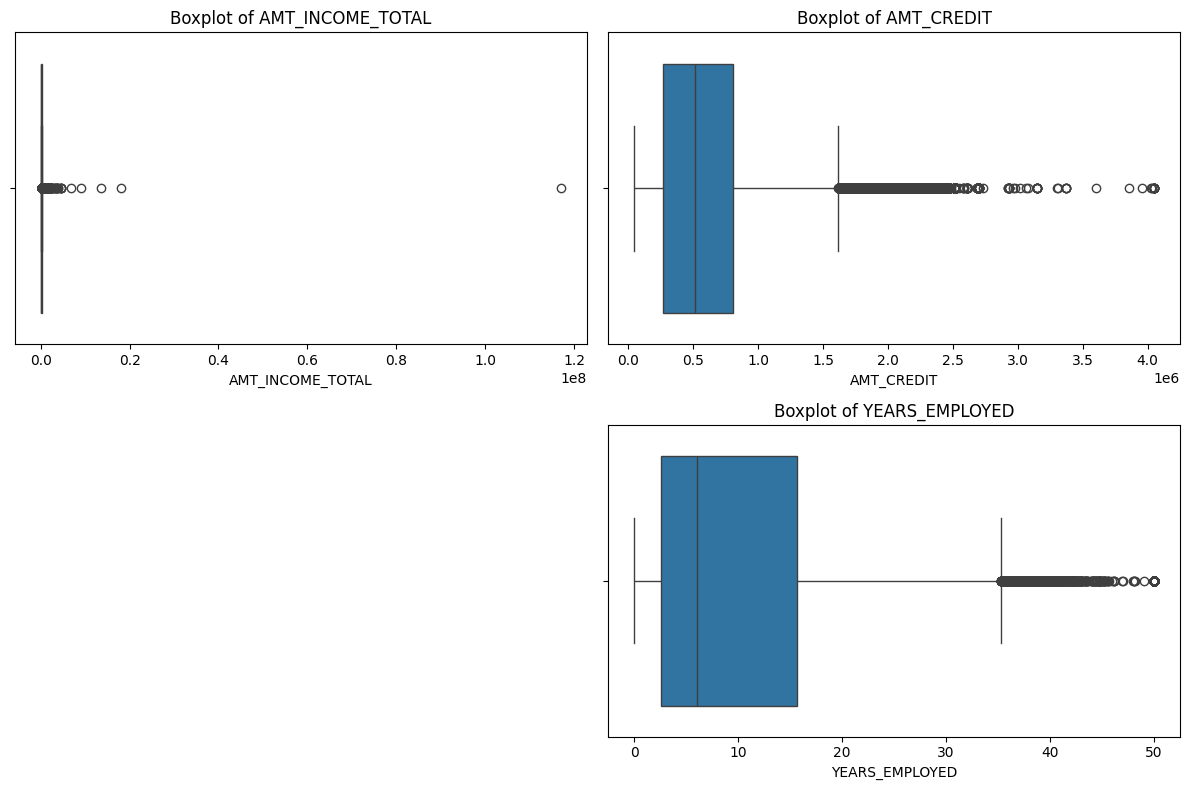

In [ ]:
# Outlier Detection

# Set up the figure for multiple boxplots
plt.figure(figsize=(12, 8))

# Subplot 1: Boxplot for AMT_INCOME_TOTAL
plt.subplot(2, 2, 1)
sns.boxplot(x=df_clean['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL')

# Subplot 2: Boxplot for AMT_CREDIT
plt.subplot(2, 2, 2)
sns.boxplot(x=df_clean['AMT_CREDIT'])
plt.title('Boxplot of AMT_CREDIT')


# Subplot 4: Boxplot for YEARS_EMPLOYED (capped previously)
plt.subplot(2, 2, 4)
sns.boxplot(x=df_clean['YEARS_EMPLOYED'])
plt.title('Boxplot of YEARS_EMPLOYED')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

1. AMT_INCOME_TOTAL:
The boxplot indicates extreme outliers, with values reaching up to 120 million. The majority of the data points are concentrated near the lower end.


2. AMT_CREDIT:
There are several outliers visible, especially beyond 1.5 million. However, the data appears more concentrated around the lower end, with a few larger credit amounts.


3. YEARS_EMPLOYED:
This variable shows a capped range (with values maxed at 50 years). While there are some outliers near the cap, the majority of the data falls within a more reasonable range.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


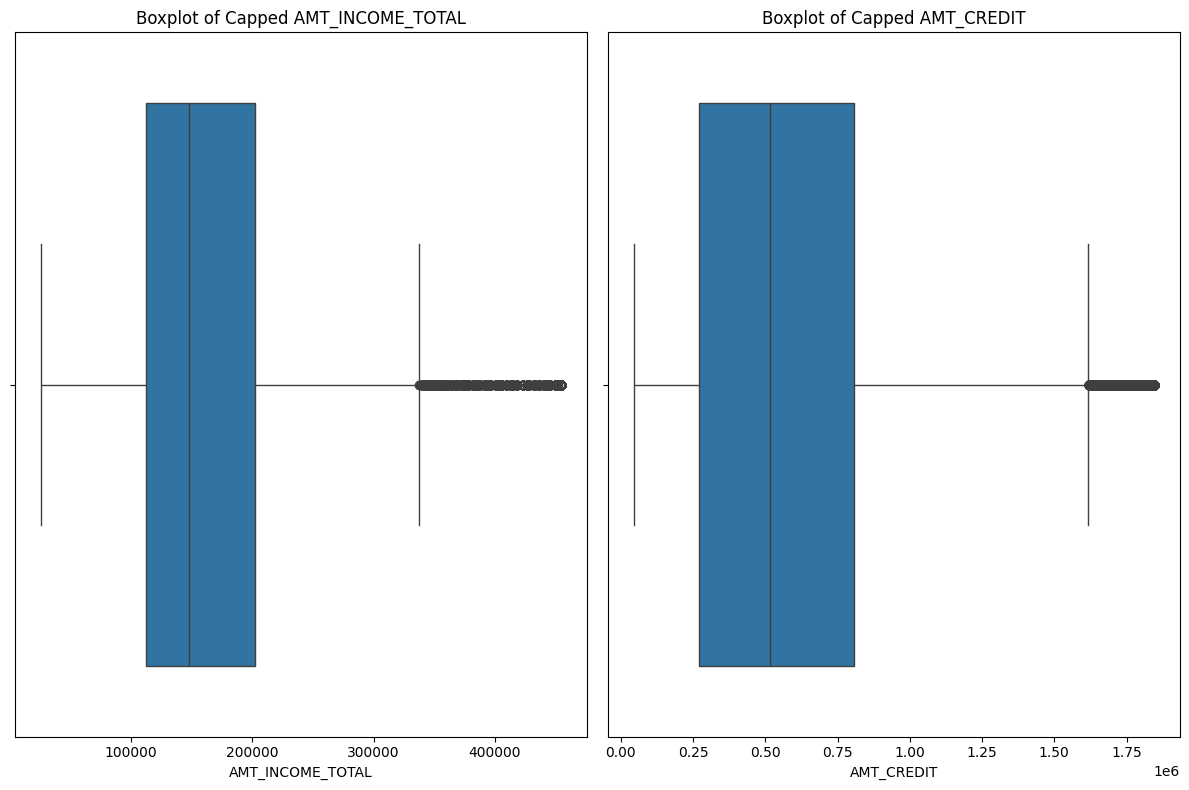

In [ ]:
# Cap

# Calculate the 99th percentile for both columns
cap_amt_income_total = df_clean['AMT_INCOME_TOTAL'].quantile(0.99)
cap_amt_credit = df_clean['AMT_CREDIT'].quantile(0.99)

# Apply the caps
df_clean['AMT_INCOME_TOTAL'] = df_clean['AMT_INCOME_TOTAL'].apply(lambda x: min(x, cap_amt_income_total))
df_clean['AMT_CREDIT'] = df_clean['AMT_CREDIT'].apply(lambda x: min(x, cap_amt_credit))

# Visualize the capped boxplots
plt.figure(figsize=(12, 8))

# Subplot 1: Boxplot for capped AMT_INCOME_TOTAL
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Capped AMT_INCOME_TOTAL')

# Subplot 2: Boxplot for capped AMT_CREDIT
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['AMT_CREDIT'])
plt.title('Boxplot of Capped AMT_CREDIT')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

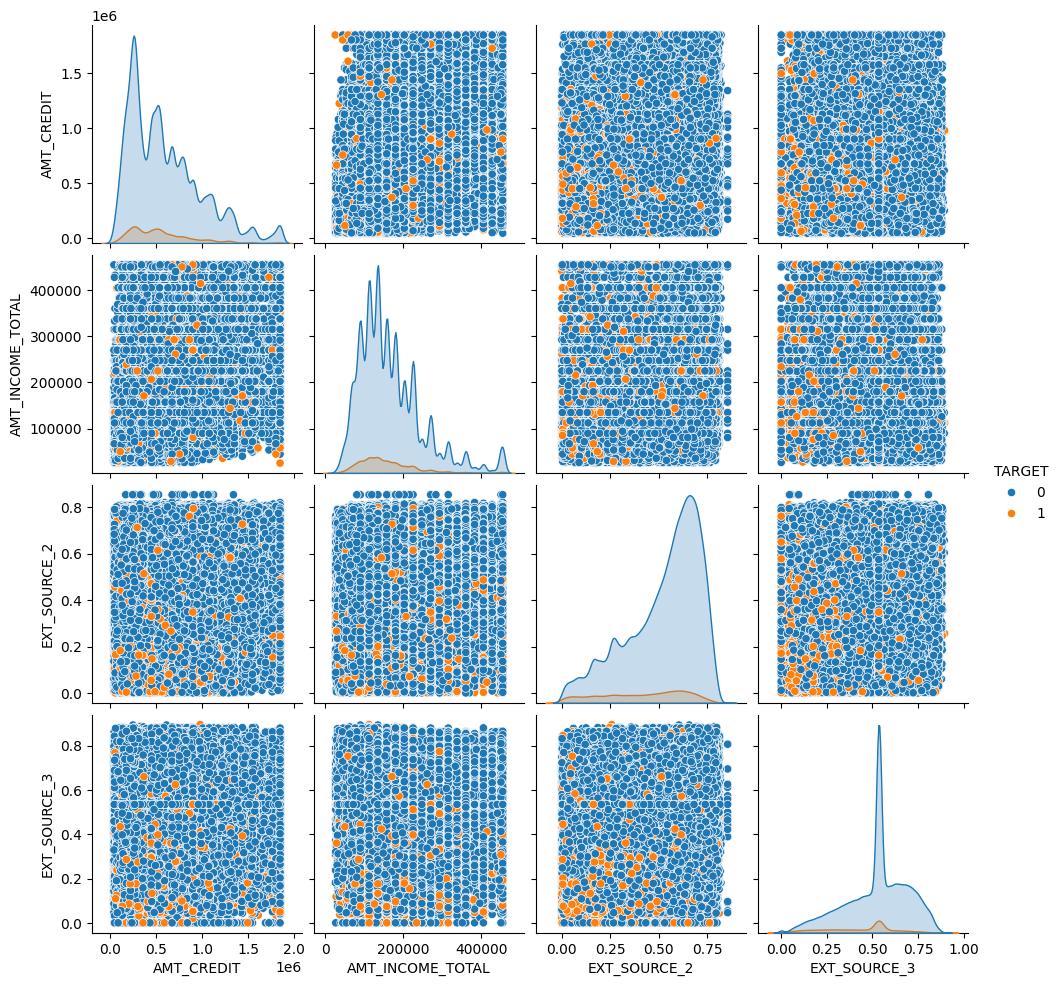

In [ ]:
# Multivariate Analysis

sns.pairplot(df_clean[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']], hue='TARGET')


Observations:

Distributions:

AMT_CREDIT and AMT_INCOME_TOTAL have right-skewed distributions, meaning the majority of values are concentrated at lower amounts with a long tail of larger values.
EXT_SOURCE_2 and EXT_SOURCE_3 have more balanced distributions, with EXT_SOURCE_3 showing a sharp peak around 0.5 to 0.6.
Relationship between Features:

There appears to be no strong linear correlation between most features, which is expected given the scattered nature of the plots.
EXT_SOURCE_2 and EXT_SOURCE_3 have distributions that separate the default (TARGET = 1) and non-default (TARGET = 0) classes quite well, suggesting they are informative for predicting default risk.
Target Distributions:

Defaulting clients (TARGET = 1, orange) are relatively scattered throughout the feature space. However, for variables like EXT_SOURCE_2 and EXT_SOURCE_3, we can see a visible concentration of non-defaulters (blue) at higher values and defaulters at lower values.

Insights:

Predictive Features: The external source scores (EXT_SOURCE_2 and EXT_SOURCE_3) appear to be strong differentiators between defaulters and non-defaulters, with higher values indicating lower default risk.

Non-Linear Relationships: The scatter plots show a generally weak linear relationship between most pairs of variables, suggesting that non-linear models may perform better for prediction.

In [ ]:
# FEATURE ENGINEERING

# 1. Create Credit-to-Income Ratio
df_clean['CREDIT_INCOME_RATIO'] = df_clean['AMT_CREDIT'] / df_clean['AMT_INCOME_TOTAL']

# 2. Combine External Source Scores into a Single Aggregated Score (mean)
df_clean['EXT_SOURCE_MEAN'] = df_clean[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

# 3. Binning Years Employed (create bins for employment duration)
bins = [0, 5, 10, 20, 30, 50]  # Example bins (0-5 years, 5-10 years, etc.)
labels = ['0-5', '5-10', '10-20', '20-30', '30+']
df_clean['YEARS_EMPLOYED_BINNED'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=bins, labels=labels)

# Display the first few rows to see the new features
df_clean.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_GROUP,CREDIT_INCOME_RATIO,EXT_SOURCE_MEAN,YEARS_EMPLOYED_BINNED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,25.920548,"(20, 30]",1.745205,"(0, 5]",2.007889,0.201162,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,45.931507,"(40, 50]",3.254795,"(0, 5]",4.790750,0.578761,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,52.180822,"(50, 60]",0.616438,"(0, 5]",2.000000,0.642739,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,1.0,52.068493,"(50, 60]",8.326027,"(5, 10]",2.316167,0.592859,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,54.608219,"(50, 60]",8.323288,"(5, 10]",4.222222,0.429007,5-10


In [ ]:
# Convert categorical columns into dummy/indicator variables using pd.get_dummies
df_clean_dummies = pd.get_dummies(df_clean, drop_first=True)

# Set to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the entire DataFrame
df_clean_dummies.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,CREDIT_INCOME_RATIO,EXT_SOURCE_MEAN,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE

Top Correlations with TARGET:
TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060900
REGION_RATING_CLIENT           0.058904
DAYS_LAST_PHONE_CHANGE         0.055887
DAYS_ID_PUBLISH                0.051397
REG_CITY_NOT_WORK_CITY         0.051146
FLAG_EMP_PHONE                 0.046223
REG_CITY_NOT_LIVE_CITY         0.044723
FLAG_DOCUMENT_3                0.043944
DAYS_REGISTRATION              0.042265
LIVE_CITY_NOT_WORK_CITY        0.032542
DEF_30_CNT_SOCIAL_CIRCLE       0.032068
DEF_60_CNT_SOCIAL_CIRCLE       0.031140
FLAG_WORK_PHONE                0.028366
CNT_CHILDREN                   0.019236
Name: TARGET, dtype: float64


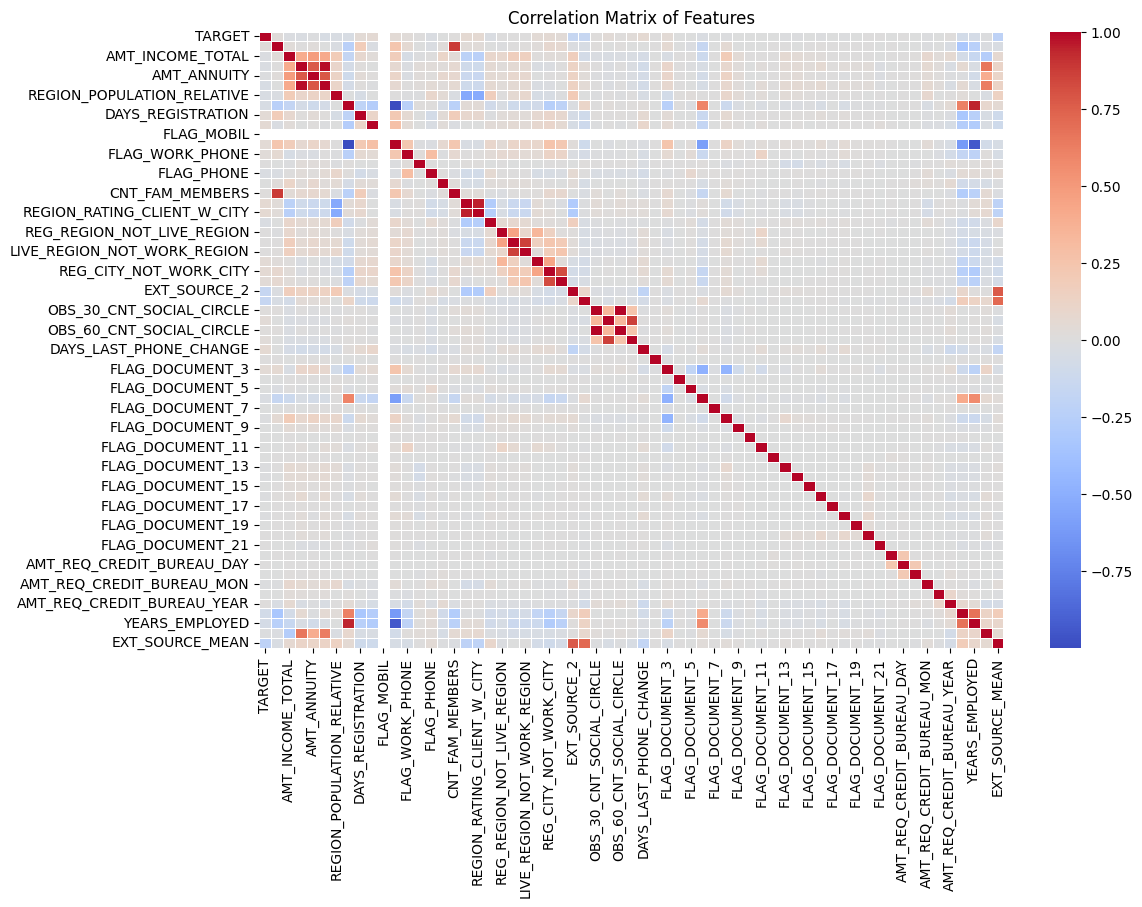

In [ ]:
## FEATURE SELECTION

# DROP SK_CURR_ID : IRRELEVANT for prediction

df_clean_dummies = df_clean_dummies.drop('SK_ID_CURR',axis = 1)

# Select only numeric columns from the dataframe
numeric_df = df_clean_dummies.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix to analyze relationships between numeric features and the target
corr_matrix = numeric_df.corr()

# Filter the correlation for TARGET column
corr_target = corr_matrix['TARGET'].sort_values(ascending=False)

# Display the top correlations
print("Top Correlations with TARGET:")
print(corr_target.head(15))  # Top 15 correlations

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

Analysis of Top Correlations with TARGET:

Positive Correlations:
REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT show the strongest positive correlations with TARGET, but the values are relatively low (~0.06), indicating weak linear relationships.
Features like DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, and DAYS_REGISTRATION also have weak positive correlations with the target, but they may still provide useful information in combination with other features.
Social circle variables (DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE) and employment-related features like FLAG_EMP_PHONE and FLAG_WORK_PHONE have small correlations, suggesting that these factors might have some relevance to default prediction.

Insights:

None of the individual features shows a strong linear correlation with the TARGET variable (as most correlations are close to 0), which suggests that there might be more complex, non-linear relationships between the features and the target.

Top 15 Important Features:
                       Feature  Importance
61             EXT_SOURCE_MEAN    0.063636
25                EXT_SOURCE_2    0.051447
26                EXT_SOURCE_3    0.046325
8              DAYS_ID_PUBLISH    0.040543
58                         AGE    0.040419
7            DAYS_REGISTRATION    0.040324
60         CREDIT_INCOME_RATIO    0.038285
3                  AMT_ANNUITY    0.037675
31      DAYS_LAST_PHONE_CHANGE    0.036189
2                   AMT_CREDIT    0.034781
59              YEARS_EMPLOYED    0.034238
6                DAYS_EMPLOYED    0.033162
5   REGION_POPULATION_RELATIVE    0.031529
1             AMT_INCOME_TOTAL    0.030161
4              AMT_GOODS_PRICE    0.030022


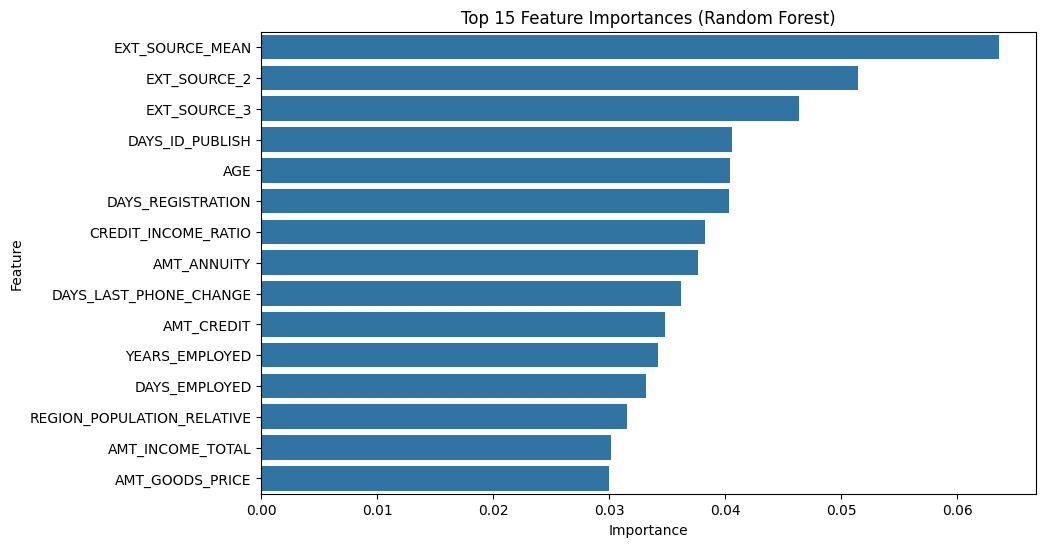

In [ ]:
## Using RandomForest to indentify important features

# Prepare data for modeling (exclude TARGET)
X = df_clean_dummies.drop(columns='TARGET')
y = df_clean_dummies['TARGET'].astype('int')

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to store feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 15 important features
print("Top 15 Important Features:")
print(feature_importances.head(15))

# Visualize feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()

EXT_SOURCE_MEAN (0.0629):

The combined external source score remains the most important feature, reinforcing its predictive power for default risk.

EXT_SOURCE_2 (0.0516) and EXT_SOURCE_3 (0.0467):

These individual external source scores also contribute significantly to the model, further confirming the importance of third-party risk evaluations.

DAYS_ID_PUBLISH (0.0408) and DAYS_REGISTRATION (0.0404):

Time-related features like when the ID was published and when the client registered continue to be important, indicating stability over time.

AGE (0.0399):

Age plays a key role in predicting default risk, with older individuals likely having a different risk profile compared to younger clients.

CREDIT_INCOME_RATIO (0.0388):

The ratio of credit to income is a crucial financial metric, showing how leveraged the client is.

AMT_ANNUITY (0.0379):

The loan’s annuity amount reflects the repayment burden, making it a key factor in determining default risk.

DAYS_LAST_PHONE_CHANGE (0.0364):

This feature continues to be an indicator of lifestyle or stability changes, potentially influencing default behavior.

AMT_CREDIT (0.0349) and AMT_GOODS_PRICE (0.0305):

The amount of credit and the price of goods purchased with the loan are significant financial indicators of risk.

YEARS_EMPLOYED (0.0344) and DAYS_EMPLOYED (0.0339):

Employment duration is crucial in assessing financial stability, with longer employment durations generally indicating lower risk.

REGION_POPULATION_RELATIVE (0.0318):

The population density of the client’s region continues to be relevant, likely capturing some economic or environmental factors affecting risk.

AMT_INCOME_TOTAL (0.0306):

The total income of the client, while still important, ranks lower than some other financial and stability-related features.

In [ ]:
# DROP Unimportant features

# Define a threshold for feature importance
threshold = 0.02

# Create a list of features that have importance greater than the threshold
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Filter the original dataset to keep only the important features
df_important = df_clean_dummies[important_features]

# Display the updated dataset with only important features
df_important.head()

,EXT_SOURCE_MEAN,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,AGE,DAYS_REGISTRATION,CREDIT_INCOME_RATIO,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,YEARS_EMPLOYED,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
0,0.201162,0.262949,0.139376,-2120,25.920548,-3648.0,2.007889,24700.5,-1134.0,406597.5,1.745205,-637,0.018801,202500.0,351000.0,10
1,0.578761,0.622246,0.535276,-291,45.931507,-1186.0,4.790750,35698.5,-828.0,1293502.5,3.254795,-1188,0.003541,270000.0,1129500.0,11
2,0.642739,0.555912,0.729567,-2531,52.180822,-4260.0,2.000000,6750.0,-815.0,135000.0,0.616438,-225,0.010032,67500.0,135000.0,9
3,0.592859,0.650442,0.535276,-2437,52.068493,-9833.0,2.316167,29686.5,-617.0,312682.5,8.326027,-3039,0.008019,135000.0,297000.0,17
4,0.429007,0.322738,0.535276,-3458,54.608219,-4311.0,4.222222,21865.5,-1106.0,513000.0,8.323288,-3038,0.028663,121500.0,513000.0,11


In [ ]:
pip install imblearn


In [ ]:
# PERFORM SMOTE BALANCING

# Split the data into features (X) and target (y)
X = df_important
y = df_clean_dummies['TARGET'].astype('int')

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target after SMOTE
print(y_resampled.value_counts())

TARGET
1    279864
0    279864
Name: count, dtype: int64


In [ ]:
# TRAIN TEST SPLIT

# Perform train-test split on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (447782, 16)
X_test shape: (111946, 16)
y_train shape: (447782,)
y_test shape: (111946,)


In [ ]:
# Scaling

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Now X_train and X_test are scaled, and y_train, y_test remain unchanged

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
## Create Model Architecture

model = Sequential()

    # Input layer (input_shape is the number of features)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # helps with convergence
model.add(Dropout(0.4))  # Dropout for regularization

    # Hidden layer 1
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))



    # Output layer (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

    # Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
## CALLBACKS

# Define the EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model during training
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1, callbacks = [early_stopping,model_checkpoint])

Epoch 1/30
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6966 - loss: 0.5897 - val_accuracy: 0.7380 - val_loss: 0.5334
Epoch 2/30
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7164 - loss: 0.5631 - val_accuracy: 0.7426 - val_loss: 0.5225
Epoch 3/30
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7217 - loss: 0.5563 - val_accuracy: 0.7455 - val_loss: 0.5201
Epoch 4/30
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7224 - loss: 0.5554 - val_accuracy: 0.7456 - val_loss: 0.5176
Epoch 5/30
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7236 - loss: 0.5537 - val_accuracy: 0.7465 - val_loss: 0.5168


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7390


3499/3499 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     55981
           1       0.73      0.75      0.74     55965

    accuracy                           0.74    111946
   macro avg       0.74      0.74      0.74    111946
weighted avg       0.74      0.74      0.74    111946

Confusion Matrix:
[[40661 15320]
 [13894 42071]]
ROC-AUC Score: 0.8175


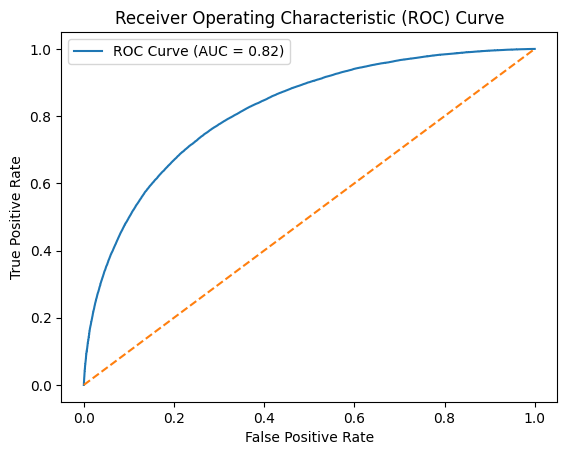

In [ ]:
# Predict the probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix to see the performance in terms of true/false positives and negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Key Metrics from the Classification Report:

Accuracy: 0.74 (which means 74% of the total predictions were correct).
Precision and Recall: Around 0.73–0.75 for both classes.
For class 0: Precision is 0.75, recall is 0.73.
For class 1: Precision is 0.73, recall is 0.75.
F1-Score: Balanced between 0.73 and 0.74 for both classes, indicating a decent trade-off between precision and recall.

Confusion Matrix:

True Positives (correctly identified class 1): 42071
False Negatives (missed class 1): 13894
True Negatives (correctly identified class 0): 40661
False Positives (incorrectly labeled as class 1): 15320
This suggests that the model has balanced performance in distinguishing between the two classes.

ROC-AUC:

ROC-AUC Score: 0.82 indicates that the model has a good capability of distinguishing between the positive and negative classes. A score of 0.82 means that for 82% of the time, the model can differentiate between a defaulter and a non-defaulter.